# EE8603 Project - Predict quality of white wine

Lingling Zhang

Student ID: 501278404

#Install Pycaret

In [21]:
# install pycaret
!pip install pycaret[full]

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached matplotlib-3.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached pyod-1.1.2.tar.gz (160 kB)
  Preparing metadata (setup.py) ... done
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB

In [7]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

#Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [3]:
# link to data: https://archive.ics.uci.edu/dataset/186/wine+quality
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality/winequality-white.csv

In [4]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip

In [5]:
!unzip -q wine.zip

In [71]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Experiment 1: without regrouping

## EDA

In [10]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
df_grp = df.groupby("quality").size()

df_grp_percent = pd.DataFrame(df_grp)
df_grp_percent.columns = ["count"]

df_grp_percent = df_grp_percent.reset_index()

df_grp_percent["percent"] = round(df_grp_percent["count"]/df.shape[0] * 100, 2)
df_grp_percent

,quality,count,percent
0,3,20,0.41
1,4,163,3.33
2,5,1457,29.75
3,6,2198,44.88
4,7,880,17.97
5,8,175,3.57
6,9,5,0.10


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [16]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
(df == 0).astype(int).sum()

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

### Distribution of each feature per category

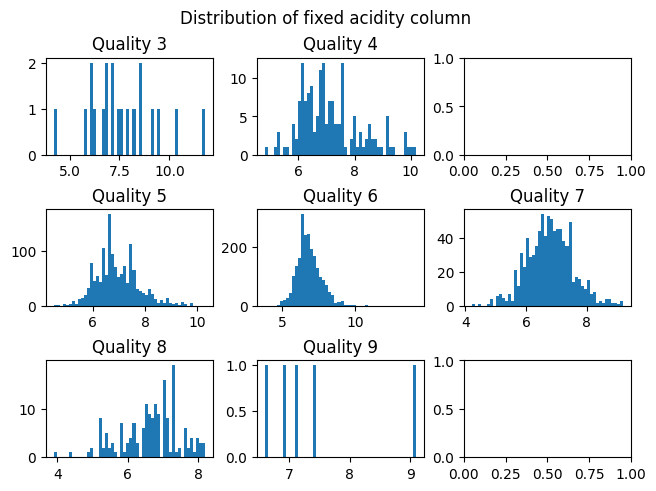

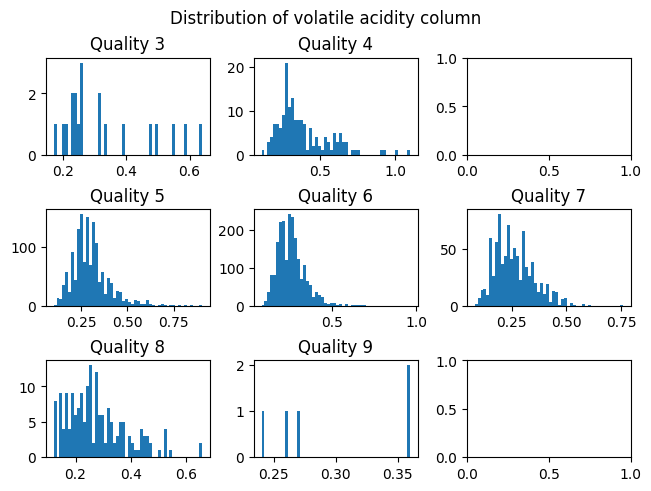

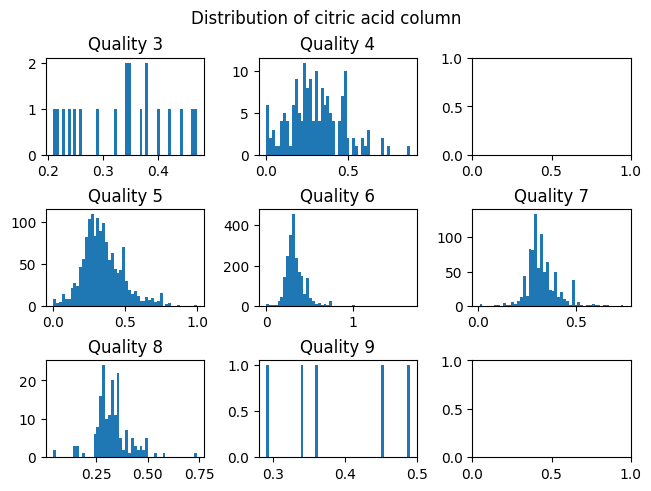

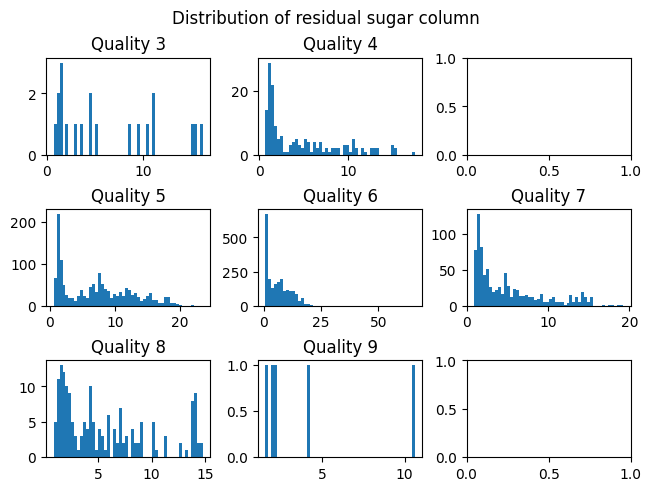

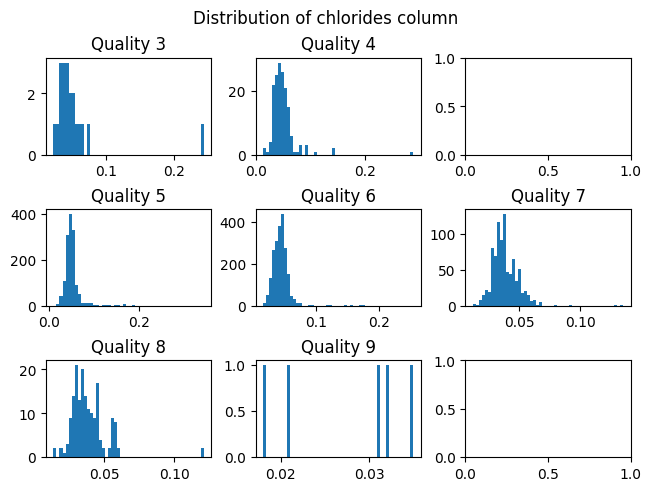

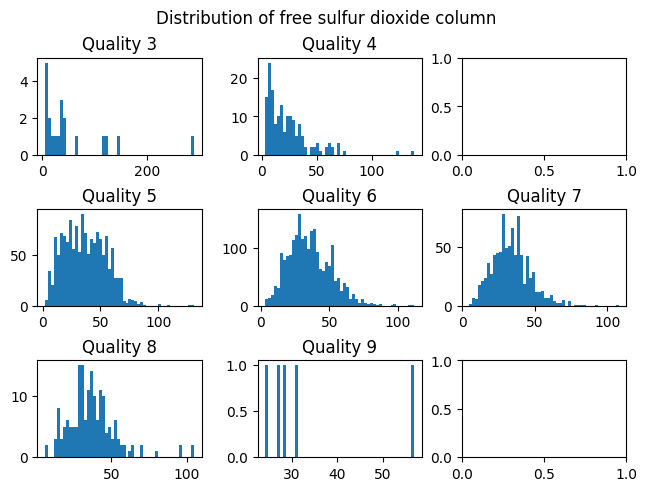

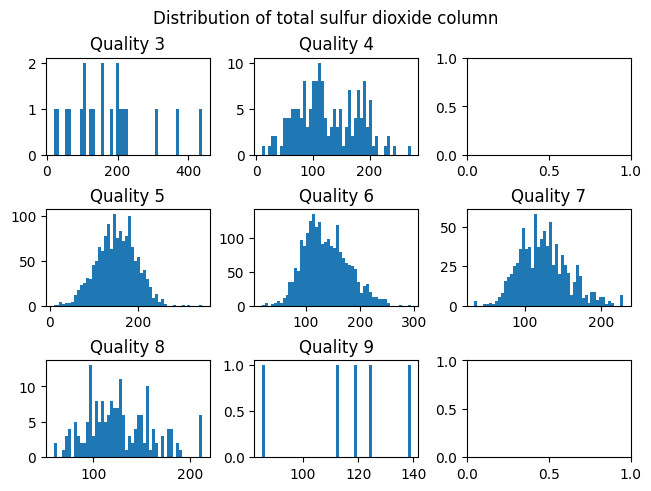

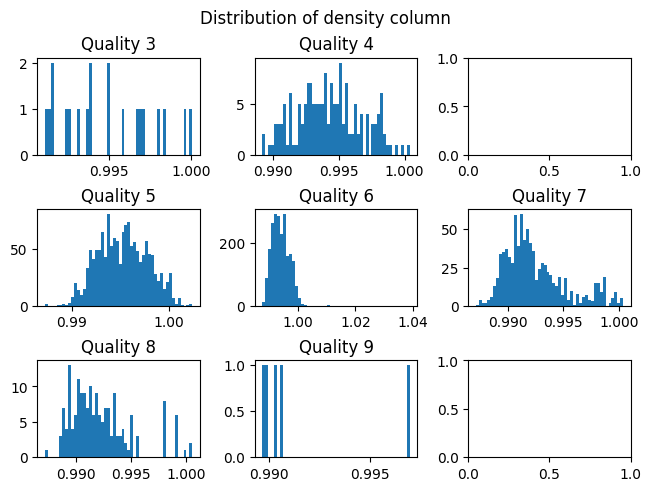

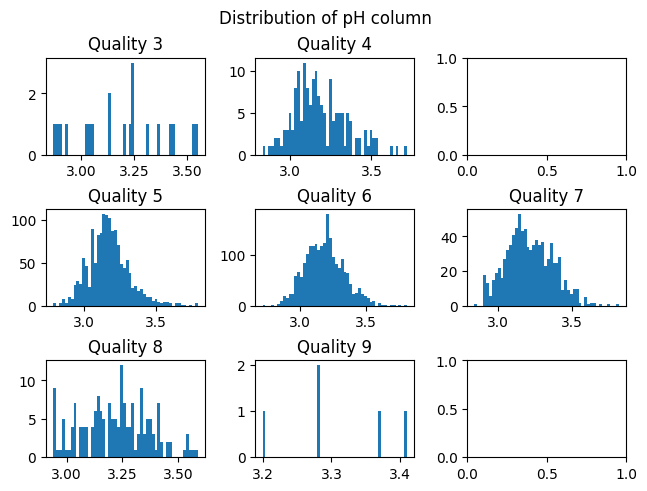

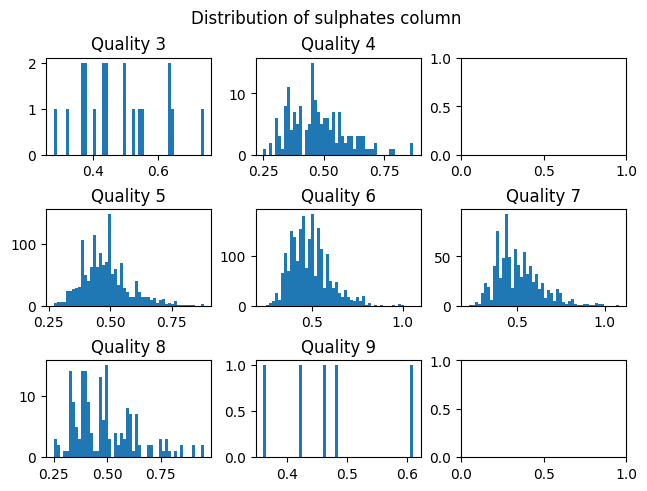

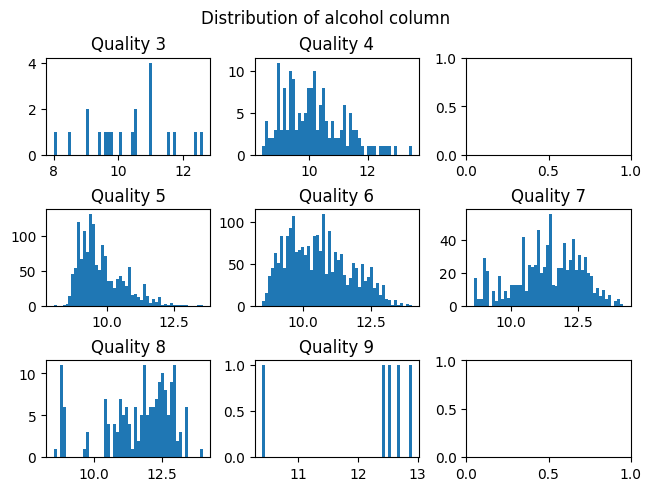

In [19]:
for c in df.columns:
    if c != "quality":
        fig, axs = plt.subplots(3, 3, layout="constrained")
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(f"Distribution of {c} column")

        axs[0, 0].hist(df[df["quality"] == 3][c]
                , bins = 50
            )



        axs[0, 0].set_title(f'Quality {3}')

        axs[0, 1].hist(df[df["quality"] == 4][c]
                , bins = 50
            )

        axs[0, 1].set_title(f'Quality {4}')

        axs[1, 0].hist(df[df["quality"] == 5][c]
                , bins = 50
            )

        axs[1, 0].set_title(f'Quality {5}')

        axs[1, 1].hist(df[df["quality"] == 6][c]
                , bins = 50
            )

        axs[1, 1].set_title(f'Quality {6}')

        axs[1, 2].hist(df[df["quality"] == 7][c]
                , bins = 50
            )

        axs[1, 2].set_title(f'Quality {7}')

        axs[2, 0].hist(df[df["quality"] == 8][c]
                , bins = 50
            )

        axs[2, 0].set_title(f'Quality {8}')

        axs[2, 1].hist(df[df["quality"] == 9][c]
                , bins = 50
            )

        axs[2, 1].set_title(f'Quality {9}')


        plt.show()

## Train


In [72]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax')

# compare baseline models
best = compare_models(sort = 'AUC')
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6590,0.3362,0.6590,0.6700,0.6468,0.4663,0.4734,0.5060
rf,Random Forest Classifier,0.6593,0.3345,0.6593,0.6713,0.6460,0.4663,0.4737,0.9940
lightgbm,Light Gradient Boosting Machine,0.6400,0.3274,0.6400,0.6439,0.6299,0.4436,0.4475,4.3540
catboost,CatBoost Classifier,0.6426,0.3269,0.6426,0.6456,0.6329,0.4477,0.4517,15.0880
xgboost,Extreme Gradient Boosting,0.6371,0.3267,0.6371,0.6409,0.6281,0.4402,0.4438,0.6030
gbc,Gradient Boosting Classifier,0.5884,0.3045,0.5884,0.5913,0.5703,0.3506,0.3601,5.0080
knn,K Neighbors Classifier,0.5318,0.2848,0.5318,0.5198,0.5200,0.2821,0.2838,0.0880
lda,Linear Discriminant Analysis,0.5283,0.2802,0.5283,0.5055,0.5008,0.2462,0.2564,0.0960
qda,Quadratic Discriminant Analysis,0.4717,0.2800,0.4717,0.4971,0.4606,0.2584,0.2703,0.0830
lr,Logistic Regression,0.5295,0.2796,0.5295,0.4976,0.4776,0.2232,0.2419,1.1470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test set

In [73]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6755,0.8695,0.6755,0.6800,0.6617,0.4904,0.5004


In [74]:
display(holdout_pred.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
3222,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6,6,0.53
3347,6.6,0.16,0.21,6.7,0.055,43.0,157.0,0.99384,3.15,0.52,10.8,6,6,0.50
3137,6.2,0.25,0.39,1.3,0.051,42.0,135.0,0.99060,3.23,0.40,11.1,6,6,0.50
89,7.1,0.44,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,6,5,0.91
1549,8.5,0.15,0.49,1.5,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6,6,0.36




Quality 3


count    6.000000
mean     0.493333
std      0.187901
min      0.300000
25%      0.370000
50%      0.440000
75%      0.585000
max      0.800000
Name: prediction_score, dtype: float64

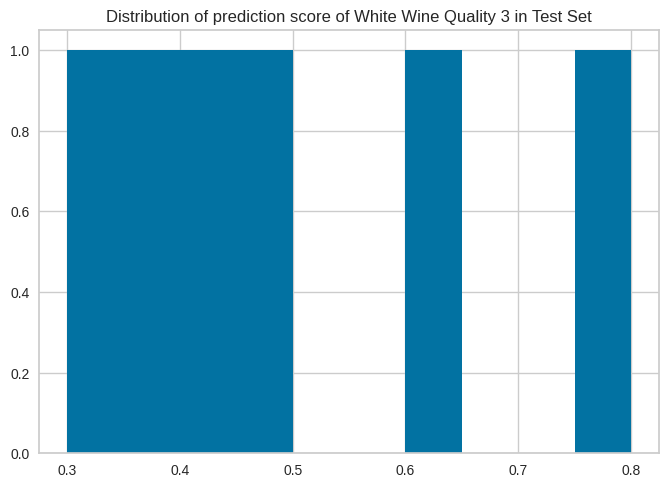



Quality 4


count    49.000000
mean      0.563878
std       0.172697
min       0.300000
25%       0.460000
50%       0.520000
75%       0.650000
max       1.000000
Name: prediction_score, dtype: float64

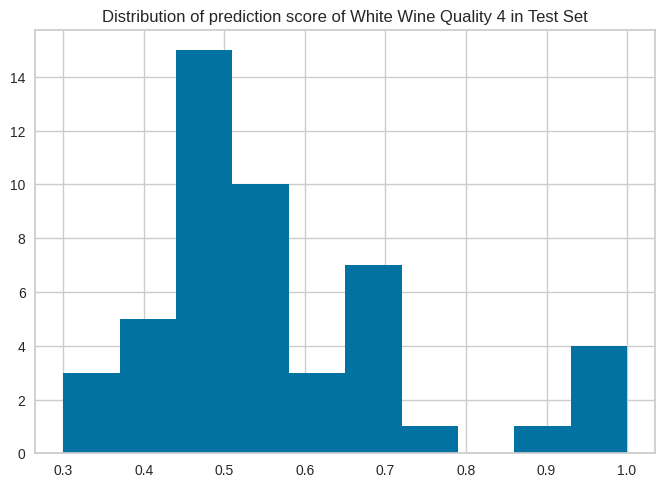



Quality 5


count    437.000000
mean       0.700938
std        0.219412
min        0.290000
25%        0.520000
50%        0.630000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

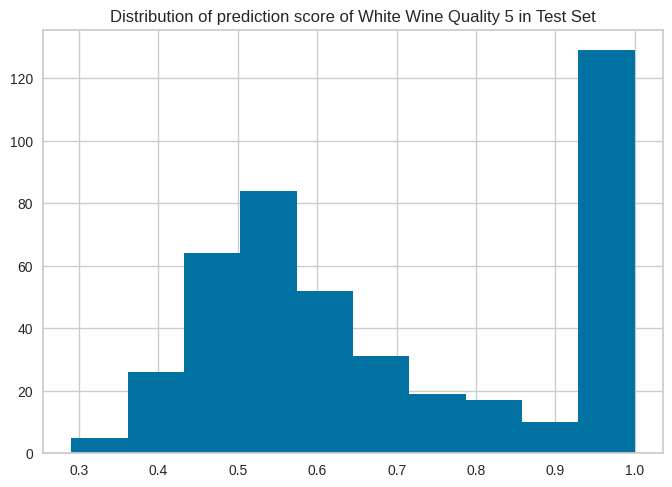



Quality 6


count    660.000000
mean       0.681924
std        0.219084
min        0.330000
25%        0.510000
50%        0.590000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

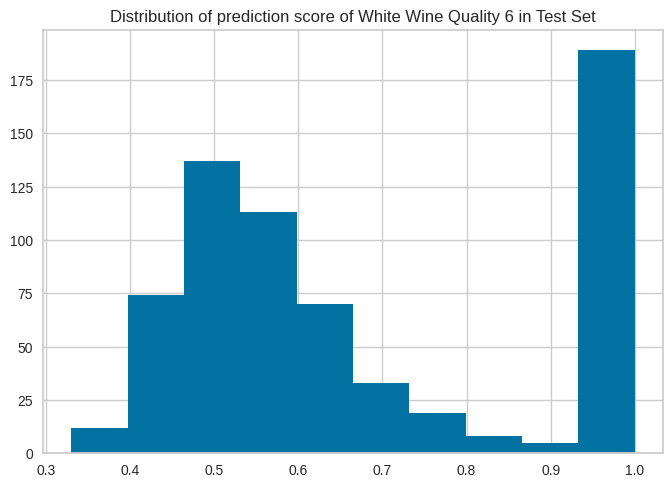



Quality 7


count    264.000000
mean       0.666477
std        0.234970
min        0.330000
25%        0.470000
50%        0.570000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

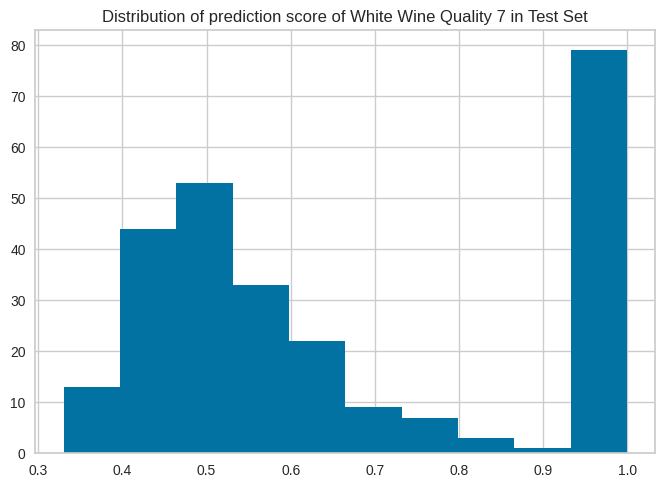



Quality 8


count    53.000000
mean      0.673774
std       0.241424
min       0.330000
25%       0.470000
50%       0.590000
75%       1.000000
max       1.000000
Name: prediction_score, dtype: float64

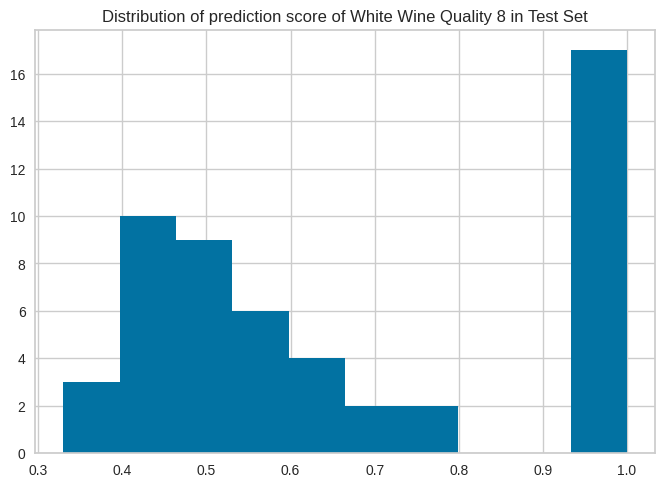



Quality 9


count    1.00
mean     0.59
std       NaN
min      0.59
25%      0.59
50%      0.59
75%      0.59
max      0.59
Name: prediction_score, dtype: float64

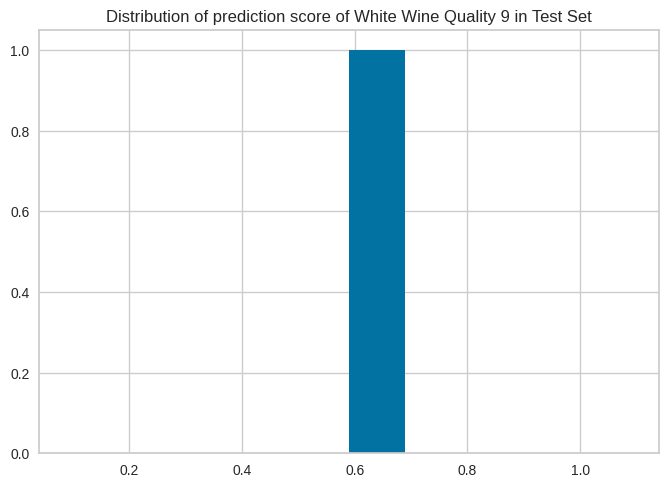

<Figure size 800x550 with 0 Axes>

In [75]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent["quality"].unique():
    print(f"\n\nQuality {q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

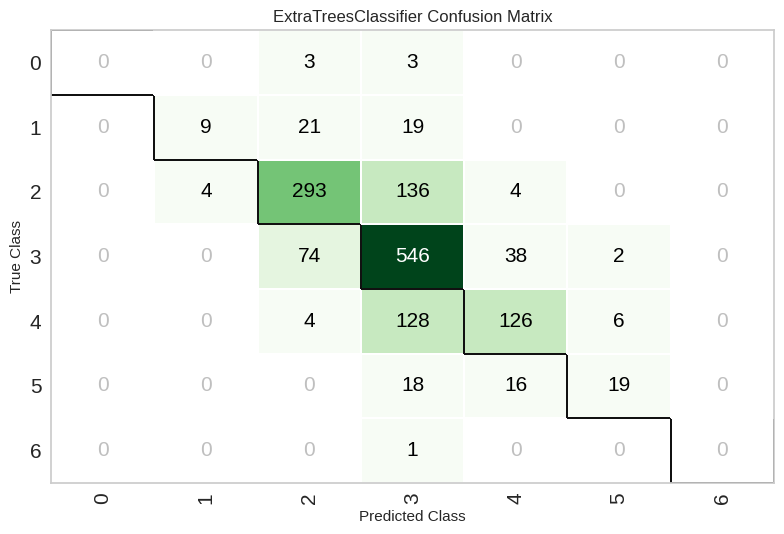

In [76]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

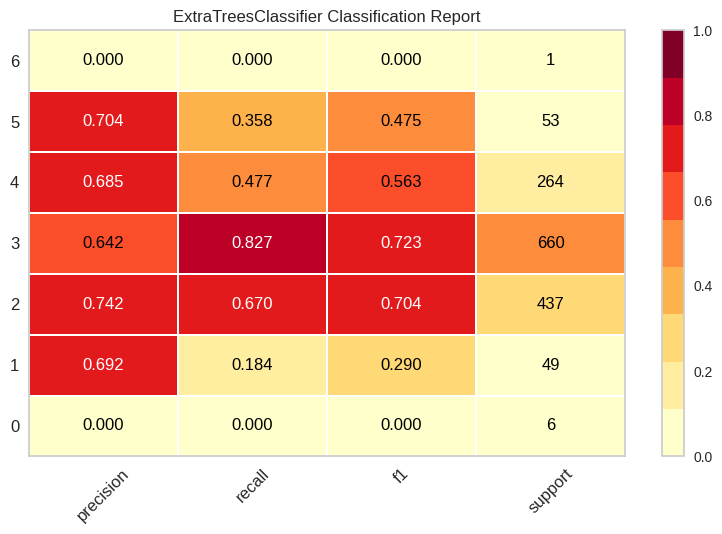

In [77]:
# plot performance by class
plot_model(best, plot = 'class_report')

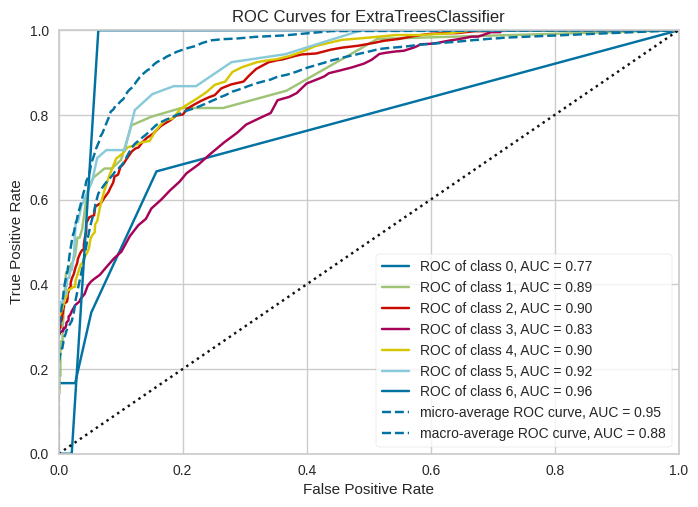

In [78]:
# plot AUC
plot_model(best, plot = 'auc')

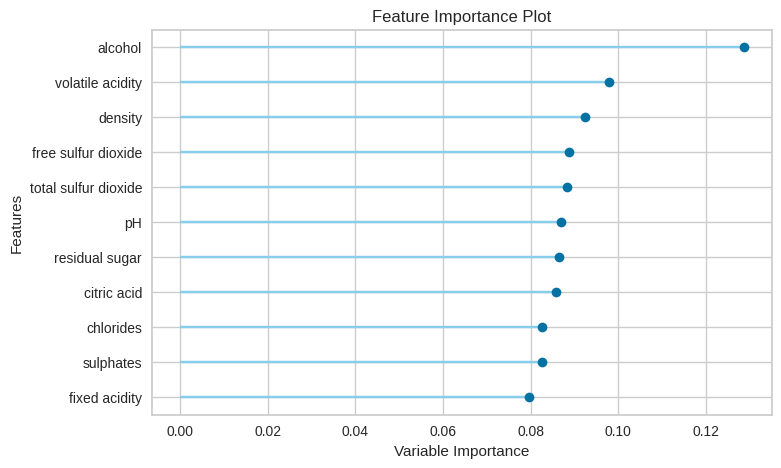

In [79]:
# plot feature importance
plot_model(best, plot = 'feature_all')

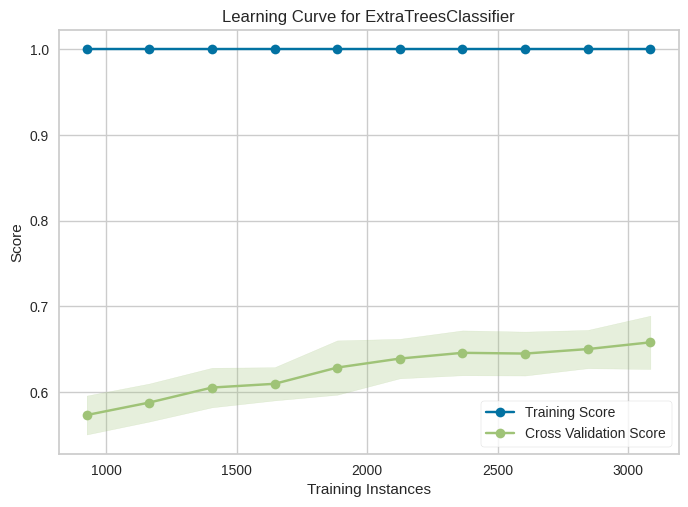

In [80]:
plot_model(best, plot = 'learning')

## Save Model

In [81]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

# Experiment 2: regrouping the Target

## Create new class column

In [32]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

In [35]:
df_grp2 = df.groupby("quality_group").size()

df_grp_percent2 = pd.DataFrame(df_grp2)
df_grp_percent2.columns = ["count"]

df_grp_percent2 = df_grp_percent2.reset_index()

df_grp_percent2["percent"] = round(df_grp_percent2["count"]/df.shape[0] * 100, 2)
df_grp_percent2

,quality_group,count,percent
0,4,183,3.74
1,5,1457,29.75
2,6,2198,44.88
3,7,880,17.97
4,8,180,3.67


In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_group
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA

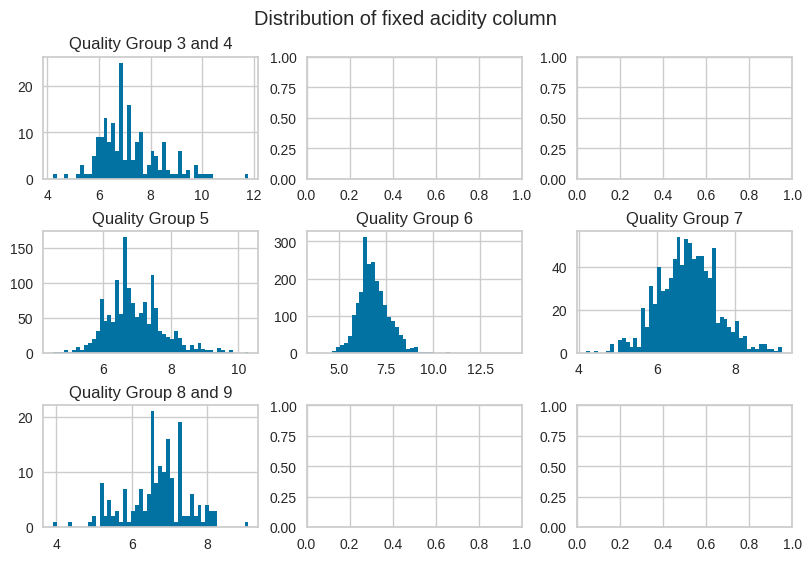

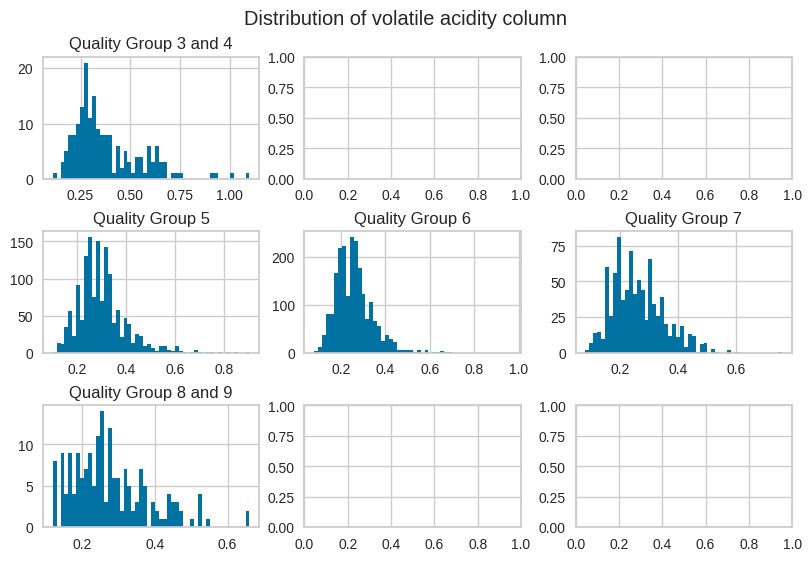

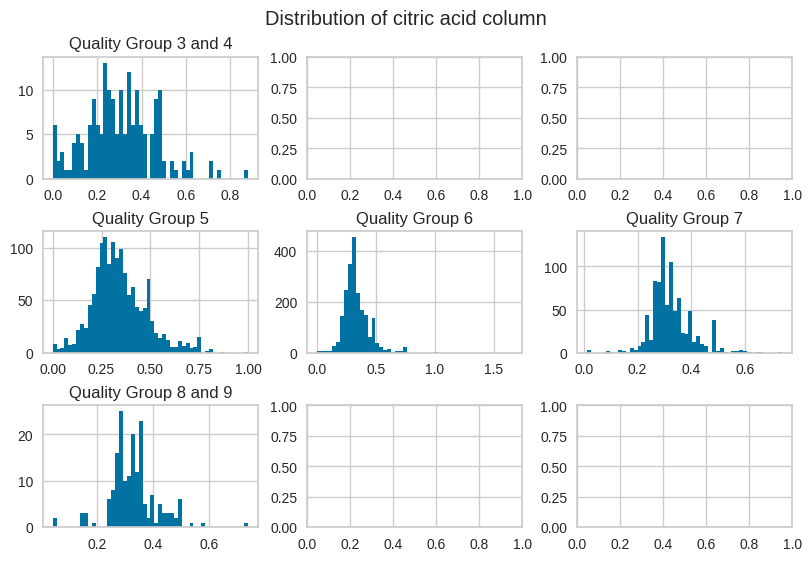

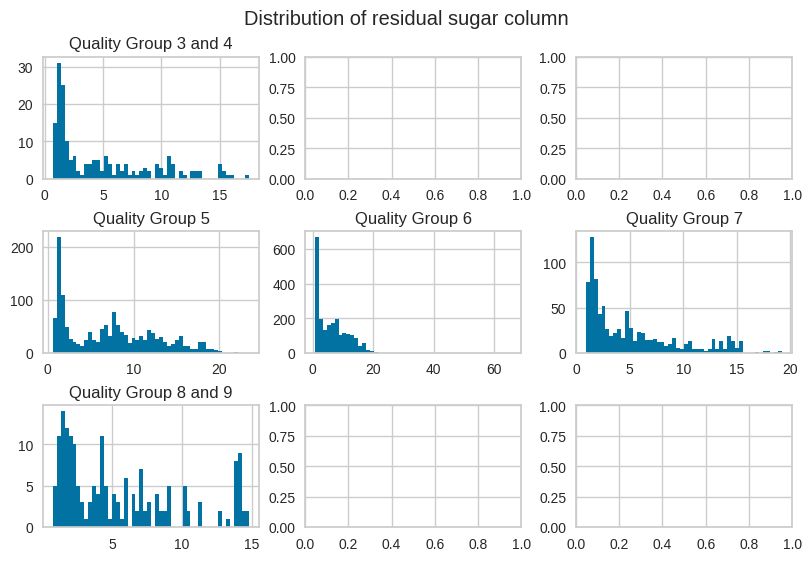

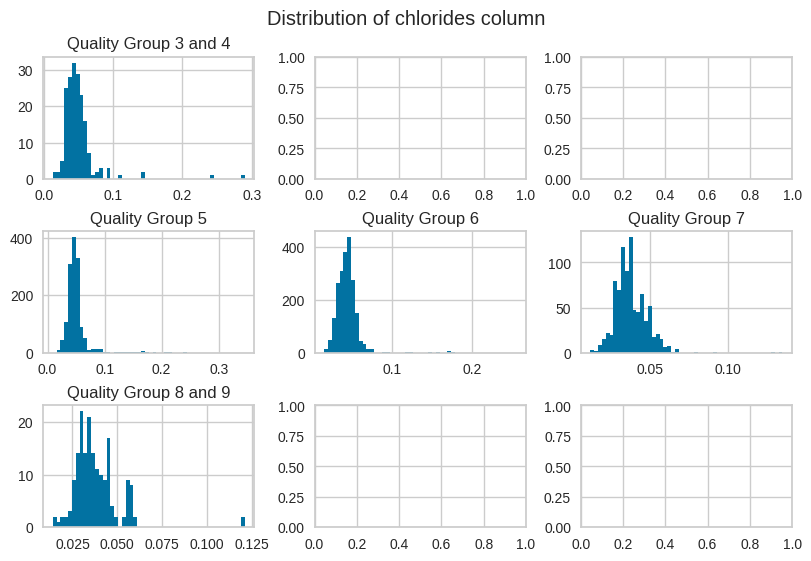

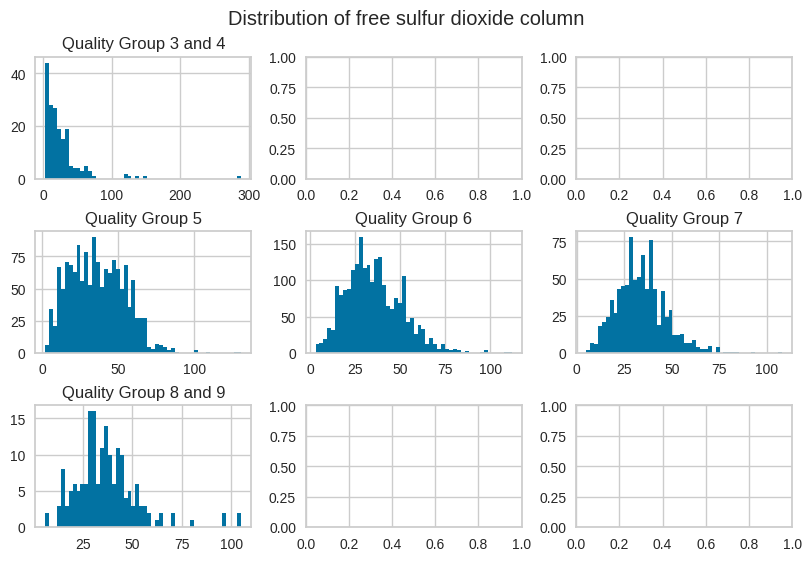

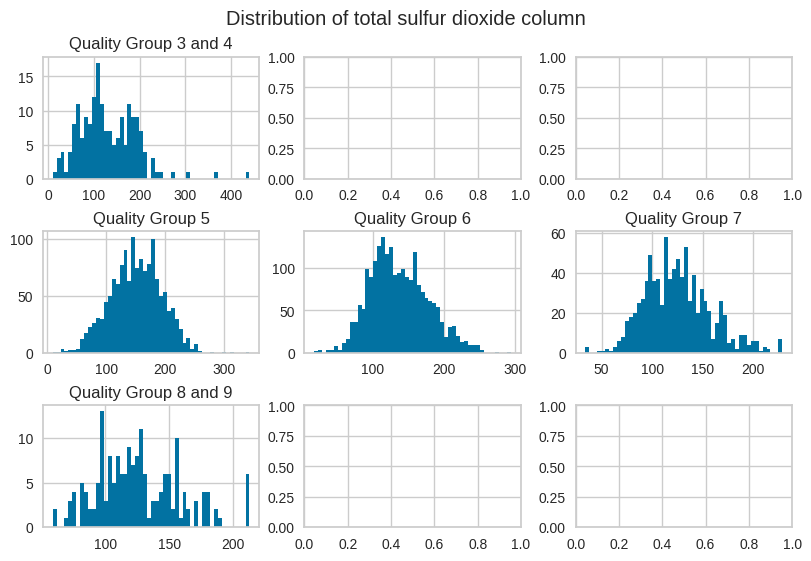

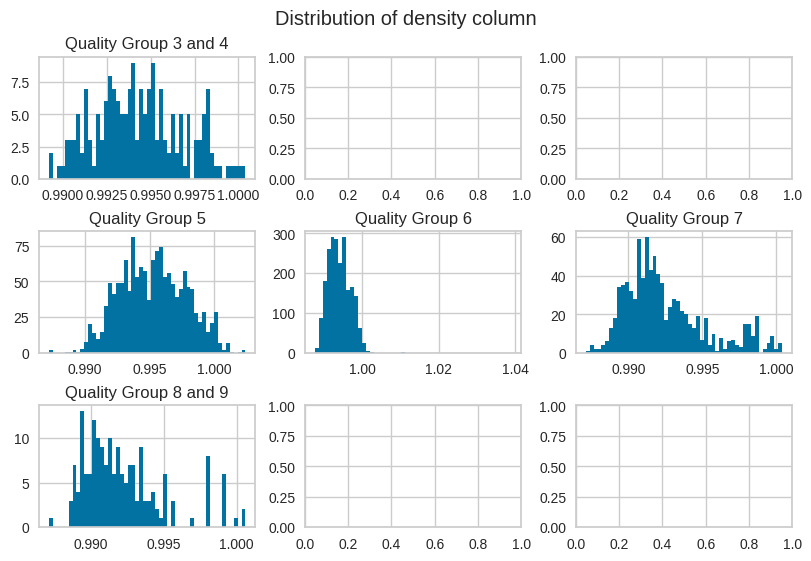

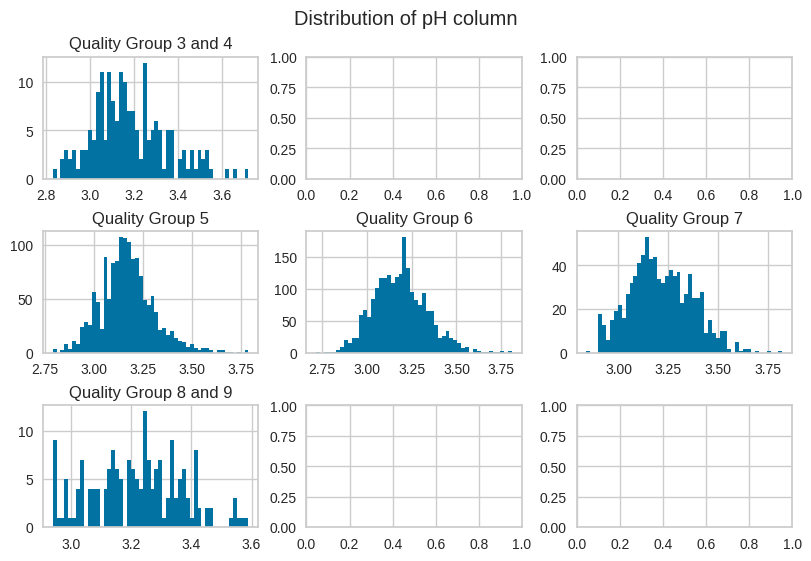

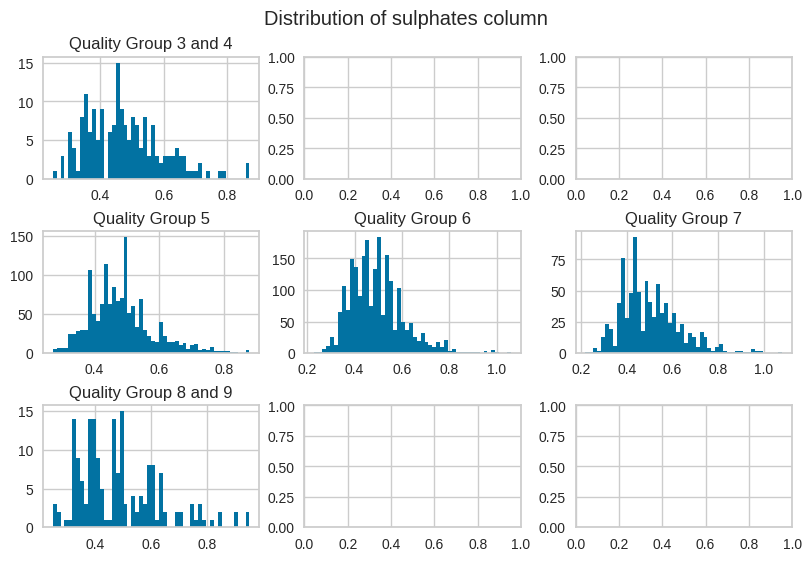

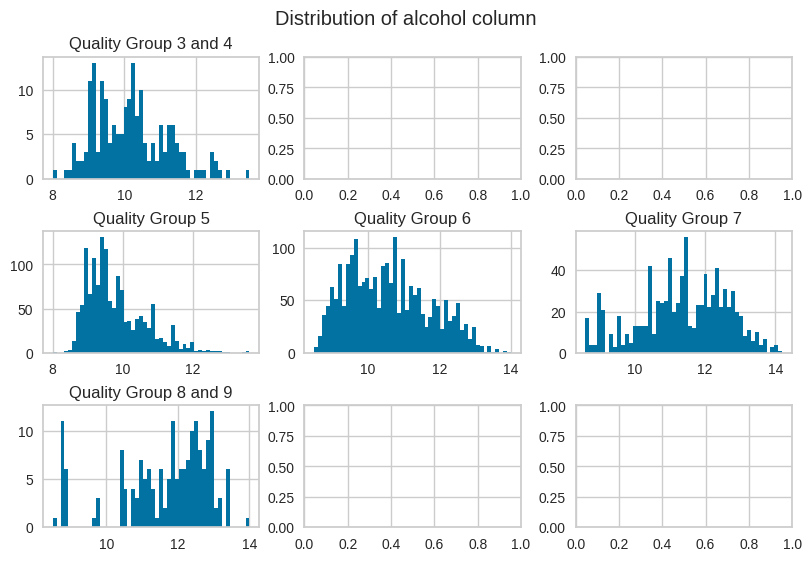

In [39]:
for c in df.columns:
    if c not in ["quality", "quality_group"]:
        fig, axs = plt.subplots(3, 3, layout="constrained")
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(f"Distribution of {c} column")

        axs[0, 0].hist(df[df["quality_group"] == 4][c]
                , bins = 50
            )

        axs[0, 0].set_title(f'Quality Group {"3 and 4"}')



        axs[1, 0].hist(df[df["quality_group"] == 5][c]
                , bins = 50
            )

        axs[1, 0].set_title(f'Quality Group {5}')

        axs[1, 1].hist(df[df["quality_group"] == 6][c]
                , bins = 50
            )

        axs[1, 1].set_title(f'Quality Group {6}')

        axs[1, 2].hist(df[df["quality_group"] == 7][c]
                , bins = 50
            )

        axs[1, 2].set_title(f'Quality Group {7}')

        axs[2, 0].hist(df[df["quality_group"] == 8][c]
                , bins = 50
            )

        axs[2, 0].set_title(f'Quality Group {"8 and 9"}')




        plt.show()

## Train

In [40]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
           )

# compare baseline models
best = compare_models(sort = "AUC")
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6546,0.8464,0.6546,0.6724,0.6434,0.4583,0.4666,0.5500
rf,Random Forest Classifier,0.6578,0.8385,0.6578,0.6725,0.6451,0.4631,0.4716,0.7380
lightgbm,Light Gradient Boosting Machine,0.6424,0.8197,0.6424,0.6474,0.6334,0.4466,0.4514,3.3480
catboost,CatBoost Classifier,0.6432,0.8151,0.6432,0.6517,0.6345,0.4485,0.4524,11.2990
xgboost,Extreme Gradient Boosting,0.6316,0.8143,0.6316,0.6385,0.6241,0.4324,0.4362,0.5260
gbc,Gradient Boosting Classifier,0.5919,0.7766,0.5919,0.5937,0.5765,0.3587,0.3668,3.8680
knn,K Neighbors Classifier,0.5330,0.7194,0.5330,0.5213,0.5208,0.2837,0.2853,0.1540
lda,Linear Discriminant Analysis,0.5327,0.7079,0.5327,0.5151,0.5070,0.2542,0.2648,0.0940
lr,Logistic Regression,0.5277,0.7066,0.5277,0.5044,0.4784,0.2219,0.2400,0.8360
qda,Quadratic Discriminant Analysis,0.4734,0.7002,0.4734,0.4953,0.4602,0.2602,0.2723,0.0440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test set

In [41]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6741,0.8654,0.6741,0.6785,0.6610,0.4904,0.4986




Quality Group4


count    55.000000
mean      0.521818
std       0.102326
min       0.340000
25%       0.450000
50%       0.510000
75%       0.600000
max       0.730000
Name: prediction_score, dtype: float64

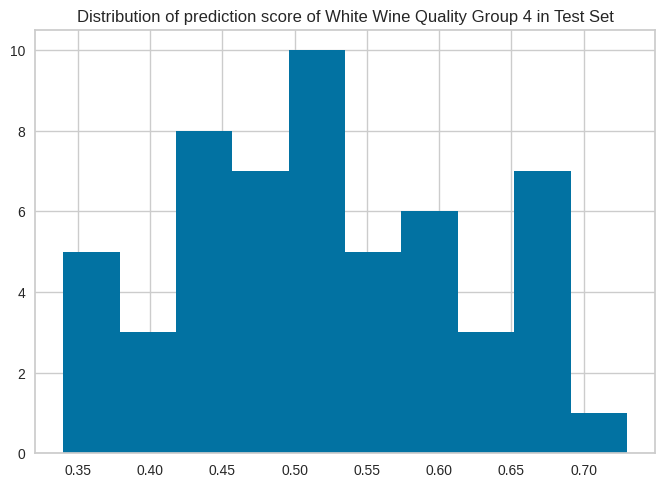



Quality Group5


count    437.000000
mean       0.647872
std        0.157363
min        0.260000
25%        0.520000
50%        0.620000
75%        0.790000
max        1.000000
Name: prediction_score, dtype: float64

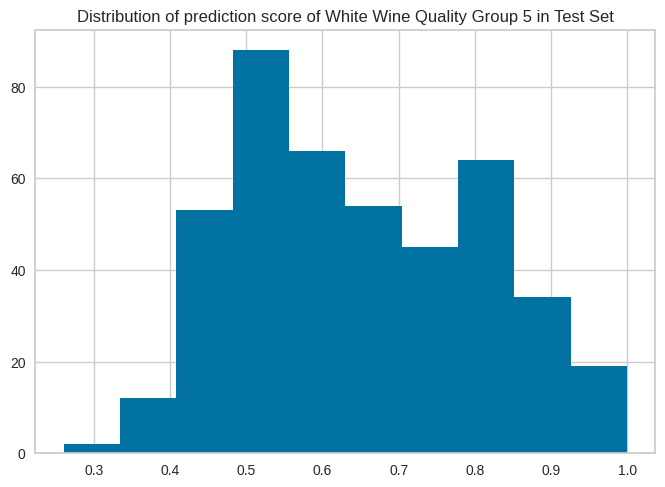



Quality Group6


count    660.000000
mean       0.632030
std        0.159047
min        0.300000
25%        0.507500
50%        0.600000
75%        0.760000
max        1.000000
Name: prediction_score, dtype: float64

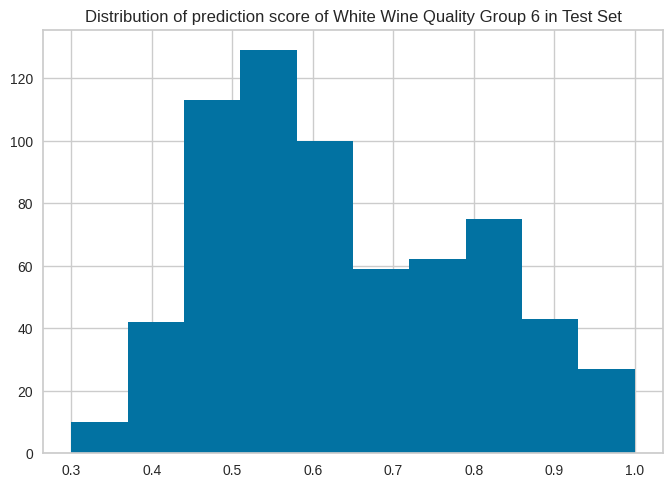



Quality Group7


count    264.000000
mean       0.614129
std        0.168171
min        0.330000
25%        0.477500
50%        0.580000
75%        0.730000
max        1.000000
Name: prediction_score, dtype: float64

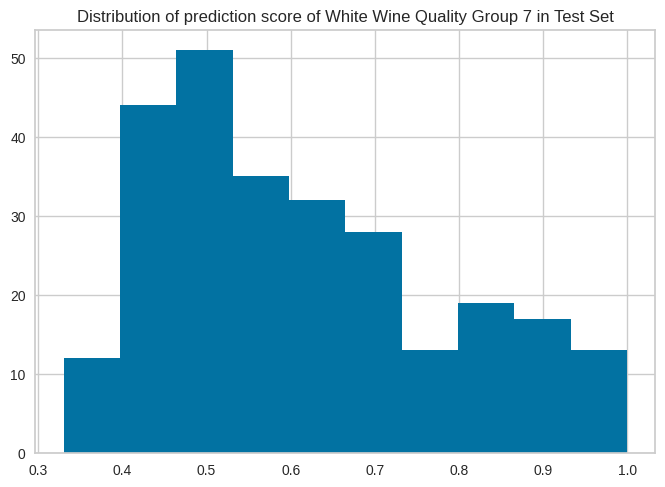



Quality Group8


count    54.000000
mean      0.574630
std       0.163392
min       0.300000
25%       0.465000
50%       0.510000
75%       0.660000
max       1.000000
Name: prediction_score, dtype: float64

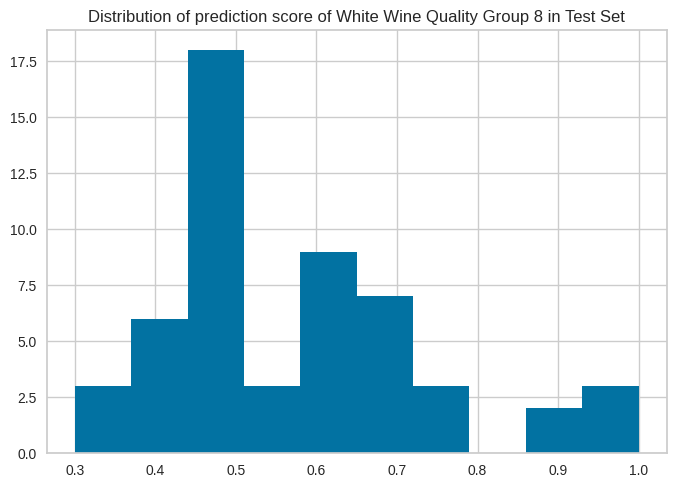

<Figure size 800x550 with 0 Axes>

In [118]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

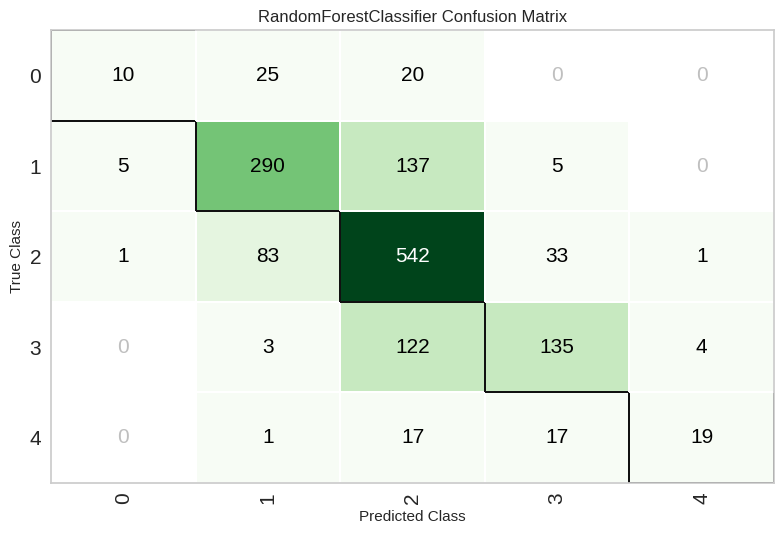

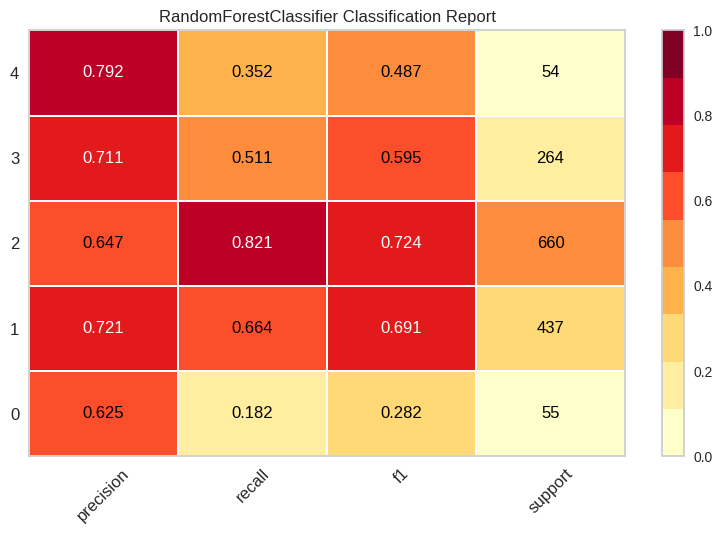

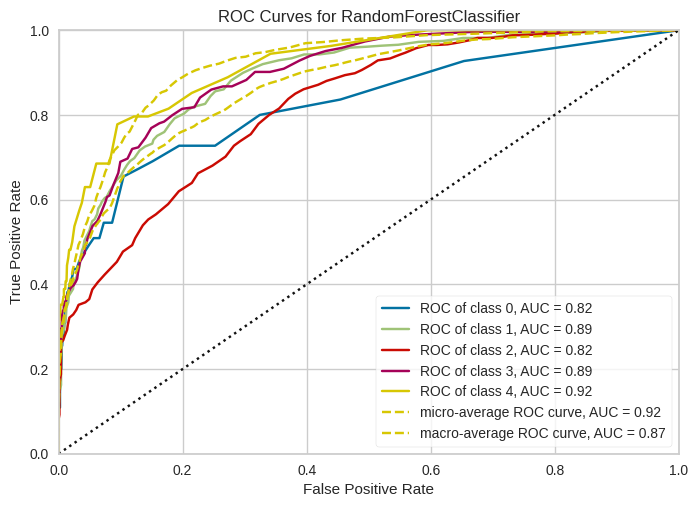

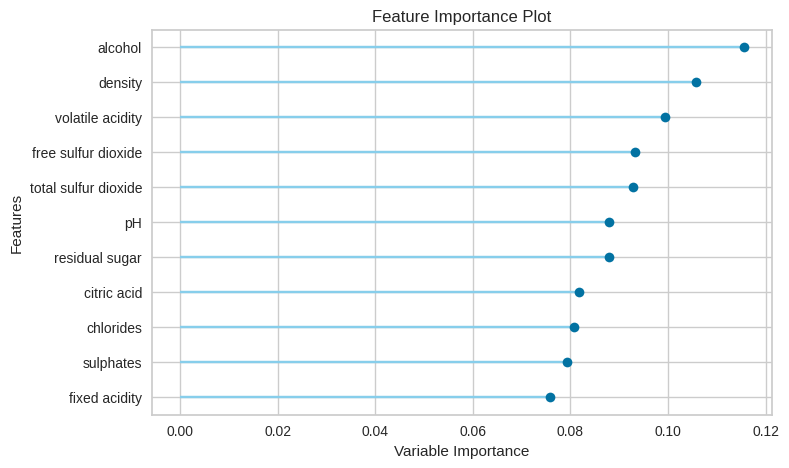

In [119]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')
# plot performance by class
plot_model(best, plot = 'class_report')
# plot AUC
plot_model(best, plot = 'auc')
# plot feature importance
plot_model(best, plot = 'feature_all')

## Save model

In [120]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

# Experiment 3: regrouping the Target and use SMOTE

## Create new class column

In [42]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

## Train

In [45]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
          , fix_imbalance = True
          , fix_imbalance_method= 'SMOTE'
          )

# compare baseline models
best = compare_models(sort = "AUC")
print("Best model's parameter:")
print(best)

,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(9160, 12)"
6,Transformed train set shape,"(7690, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6254,0.8431,0.6254,0.6342,0.6269,0.4554,0.4569,0.9060
rf,Random Forest Classifier,0.6161,0.8335,0.6161,0.6273,0.6189,0.4423,0.4436,2.2400
xgboost,Extreme Gradient Boosting,0.6173,0.8092,0.6173,0.6180,0.6158,0.4293,0.4299,1.6110
lightgbm,Light Gradient Boosting Machine,0.6082,0.8066,0.6082,0.6106,0.6076,0.4187,0.4194,6.8550
catboost,CatBoost Classifier,0.6109,0.8035,0.6109,0.6160,0.6117,0.4282,0.4290,21.1620
gbc,Gradient Boosting Classifier,0.5108,0.7509,0.5108,0.5407,0.5183,0.3115,0.3151,12.4050
knn,K Neighbors Classifier,0.4691,0.7244,0.4691,0.5418,0.4813,0.2880,0.2987,0.1570
lr,Logistic Regression,0.3442,0.6880,0.3442,0.4768,0.3659,0.1668,0.1805,1.3300
lda,Linear Discriminant Analysis,0.3615,0.6844,0.3615,0.4706,0.3823,0.1744,0.1860,0.0750
qda,Quadratic Discriminant Analysis,0.3649,0.6795,0.3649,0.4773,0.3630,0.1944,0.2131,0.0670


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Best model's parameter:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2023, verbose=0, warm_start=False)


## Evaluate on Test Set

In [132]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6422,0.8601,0.6422,0.6525,0.6460,0.4803,0.4810




Quality Group4


count    55.000000
mean      0.551455
std       0.178672
min       0.300000
25%       0.450000
50%       0.500000
75%       0.605000
max       1.000000
Name: prediction_score, dtype: float64

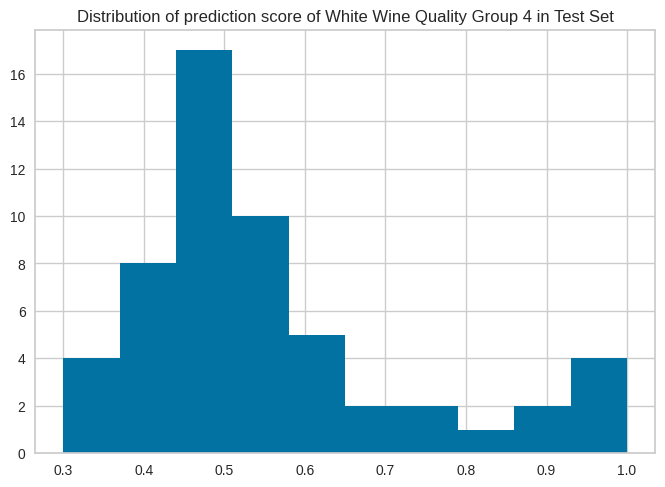



Quality Group5


count    437.000000
mean       0.666339
std        0.242939
min        0.270000
25%        0.450000
50%        0.600000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

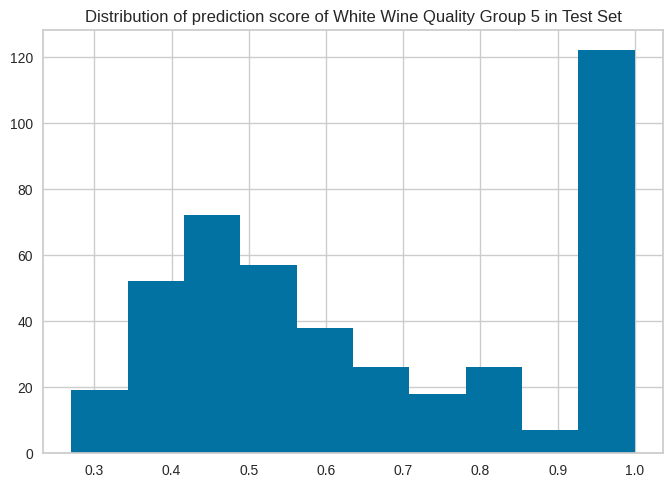



Quality Group6


count    660.000000
mean       0.622515
std        0.257239
min        0.210000
25%        0.420000
50%        0.510000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

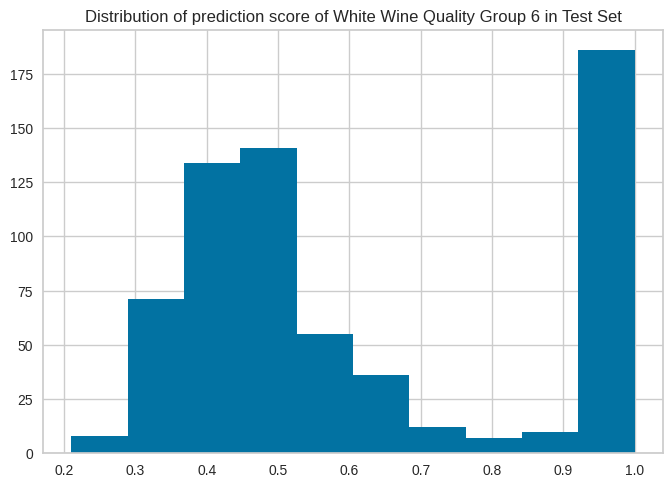



Quality Group7


count    264.000000
mean       0.630795
std        0.256353
min        0.270000
25%        0.420000
50%        0.520000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

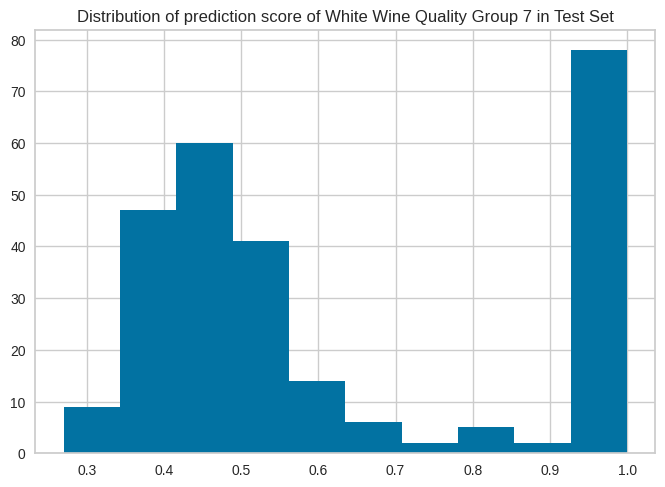



Quality Group8


count    54.000000
mean      0.642037
std       0.259691
min       0.300000
25%       0.432500
50%       0.520000
75%       1.000000
max       1.000000
Name: prediction_score, dtype: float64

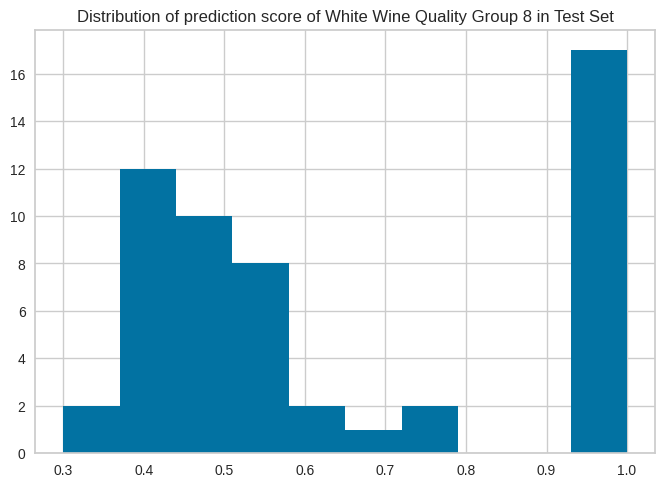

<Figure size 800x550 with 0 Axes>

In [133]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

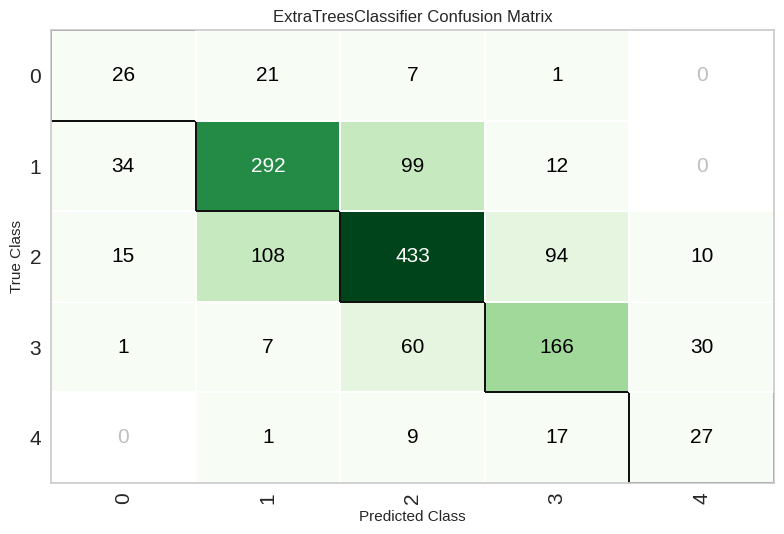

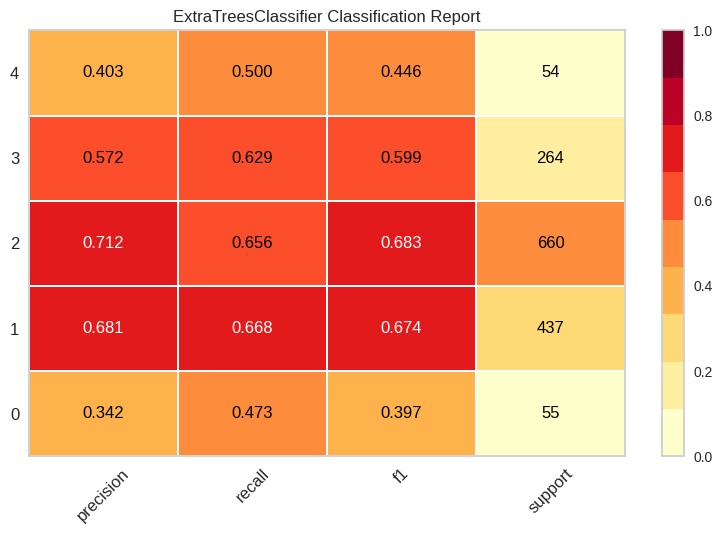

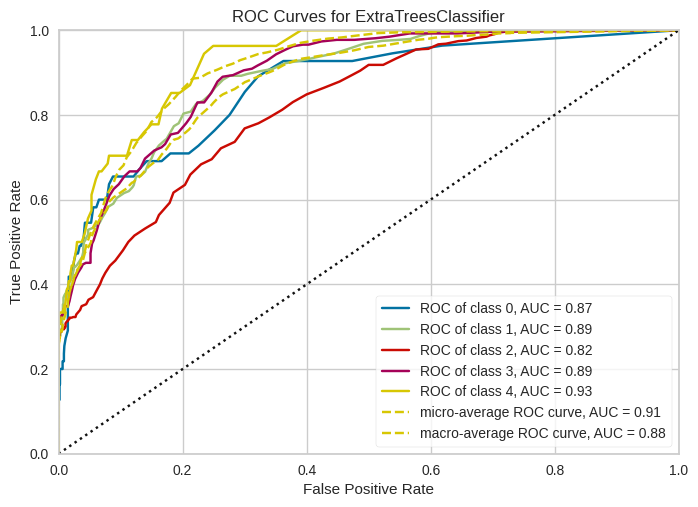

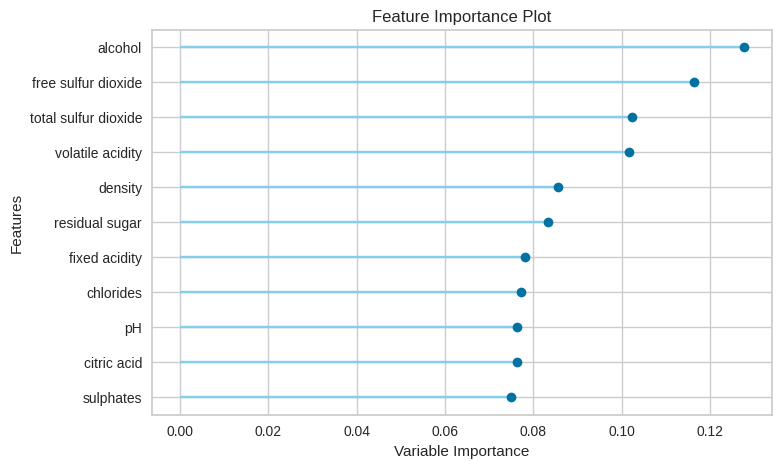

In [134]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')
# plot performance by class
plot_model(best, plot = 'class_report')
# plot AUC
plot_model(best, plot = 'auc')
# plot feature importance
plot_model(best, plot = 'feature_all')

## Save model

In [46]:
# save pipeline
save_model(best, 'pycaret_pipeline_white_wine_classification3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

# Experiment4: regrouping the Target, use SMOTE and tune Extra Tree Classifier model using Optuna

## Create new class column

In [47]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
print(df.shape)
display(df.head())
df["quality_group"] = df["quality"]

df["quality_group"] = np.where(df["quality_group"].isin([3, 4]), 4, df["quality_group"])
df["quality_group"] = np.where(df["quality_group"].isin([8, 9]), 8, df["quality_group"])
df = df.drop(columns = ["quality"])

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Train using optuna

In [48]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df
          , target = 'quality_group'
          , session_id = 2023
          , normalize = True
          , normalize_method = 'minmax'
          , fix_imbalance = True
          , fix_imbalance_method= 'SMOTE'
          )



,Description,Value
0,Session id,2023
1,Target,quality_group
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3, 8: 4"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(9160, 12)"
6,Transformed train set shape,"(7690, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


In [50]:
# train a et model with default params
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6152,0.8313,0.6152,0.6197,0.6154,0.4396,0.4410
1,0.6064,0.8407,0.6064,0.6155,0.6073,0.4274,0.4295
2,0.6093,0.8315,0.6093,0.6251,0.6145,0.4365,0.4382
3,0.6589,0.8632,0.6589,0.6668,0.6602,0.5067,0.5085
4,0.6181,0.8387,0.6181,0.6302,0.6219,0.4484,0.4496
5,0.6297,0.8451,0.6297,0.6304,0.6268,0.4557,0.4569
6,0.6268,0.8517,0.6268,0.6465,0.6345,0.4620,0.4633
7,0.6181,0.8326,0.6181,0.6217,0.6141,0.4414,0.4429
8,0.6316,0.8405,0.6316,0.6401,0.6332,0.4616,0.4630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
# define tuning grid

# tune model with custom grid and metric
tuned_et, tuner = tune_model(et, search_library = 'optuna'
                      , optimize = 'AUC', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5044,0.7652,0.5044,0.5627,0.5093,0.3299,0.3415
1,0.5335,0.7755,0.5335,0.6043,0.5439,0.3652,0.3787
2,0.4519,0.7563,0.4519,0.5194,0.4641,0.2598,0.2689
3,0.5102,0.7885,0.5102,0.5560,0.5087,0.3369,0.3486
4,0.4956,0.7603,0.4956,0.5499,0.5050,0.3097,0.3179
5,0.4665,0.7511,0.4665,0.5096,0.4722,0.2667,0.2736
6,0.4636,0.7823,0.4636,0.5196,0.4732,0.2698,0.2775
7,0.5394,0.7718,0.5394,0.5721,0.5400,0.3623,0.3705
8,0.4737,0.7747,0.4737,0.5237,0.4781,0.2780,0.2871


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-27 17:01:47,571] Searching the best hyperparameters using 3428 samples...
[I 2023-11-27 17:03:40,104] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
# model object
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2023, verbose=0, warm_start=False)

In [53]:
# tuner object
tuner

OptunaSearchCV(callbacks=None,
               cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
               enable_pruning=False, error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('label_encoding',
                                          TransformerWrapperWithInverse(exclude=None,
                                                                        include=None,
                                                                        transformer=LabelEncoder())),
                                         ('numerical_imputer',
                                          TransformerWrapper(exclude=None,
                                                             incl...
                                    'actual_estimator__min_samples_split': IntDistribution(high=10, log=False, low=2, step=1),
                                    'actual_estimator__n_estimators': IntDistribution(high=300, log=False, low=10, step=1)},
               random_state=2023, refit=False, return_train_score=False,
               scoring=make_scorer(roc_auc_score, needs_proba=True, error_score=0.0, average=weighted, multi_class=ovr),
               study=<optuna.study.study.Study object at 0x7a5e8a37ed40>,
               subsample=1.0, timeout=None, verbose=1)

## Evaluate on Test set

In [55]:
# predict on test set
holdout_pred = predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6422,0.8601,0.6422,0.6525,0.6460,0.4803,0.4810




Quality Group4


count    55.000000
mean      0.551455
std       0.178672
min       0.300000
25%       0.450000
50%       0.500000
75%       0.605000
max       1.000000
Name: prediction_score, dtype: float64

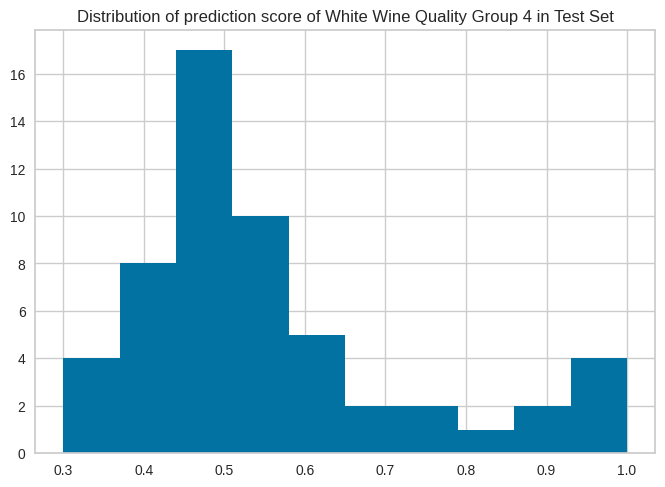



Quality Group5


count    437.000000
mean       0.666339
std        0.242939
min        0.270000
25%        0.450000
50%        0.600000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

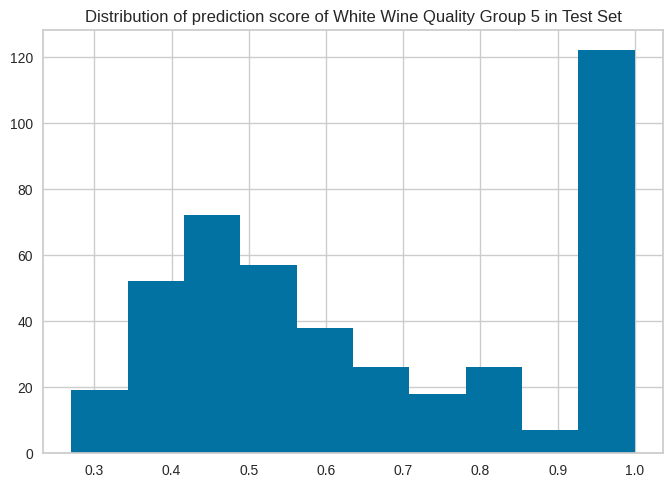



Quality Group6


count    660.000000
mean       0.622515
std        0.257239
min        0.210000
25%        0.420000
50%        0.510000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

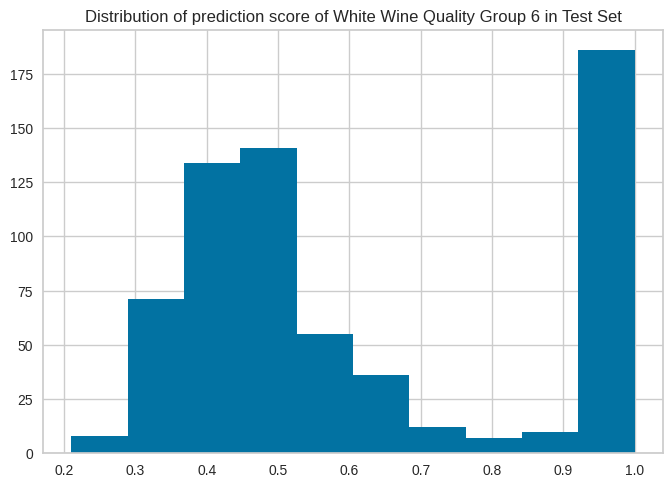



Quality Group7


count    264.000000
mean       0.630795
std        0.256353
min        0.270000
25%        0.420000
50%        0.520000
75%        1.000000
max        1.000000
Name: prediction_score, dtype: float64

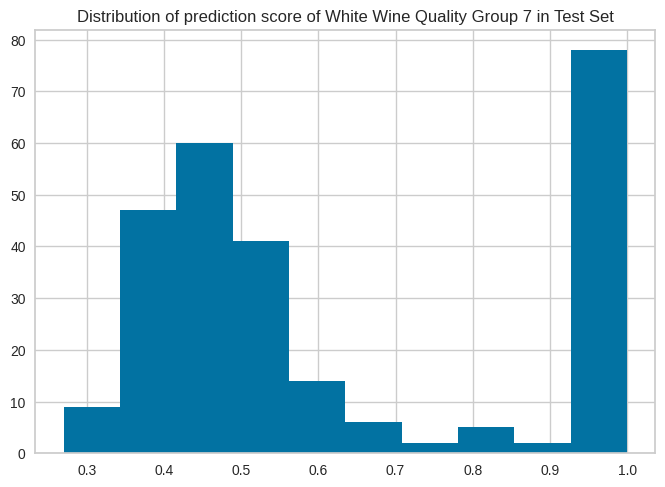



Quality Group8


count    54.000000
mean      0.642037
std       0.259691
min       0.300000
25%       0.432500
50%       0.520000
75%       1.000000
max       1.000000
Name: prediction_score, dtype: float64

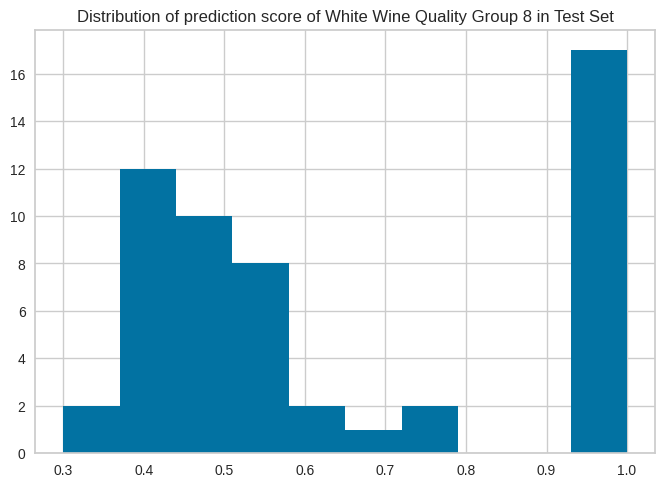

<Figure size 800x550 with 0 Axes>

In [56]:
# understand the model's perdiction score of each classes in Test Set
def hist_plot(x):
    plt.hist(x)
    plt.title(f"Distribution of prediction score of White Wine Quality Group {q} in Test Set")
    plt.show()
    plt.clf()

for q in df_grp_percent2["quality_group"].unique():
    print(f"\n\nQuality Group{q}")
    holdout_pred_q = holdout_pred[holdout_pred["quality_group"] == q]
    display(holdout_pred_q["prediction_score"].describe())
    hist_plot(holdout_pred_q["prediction_score"])

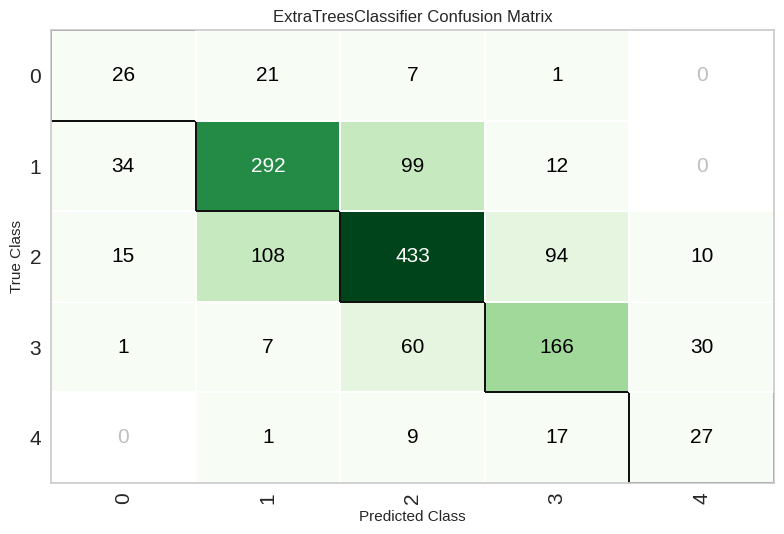

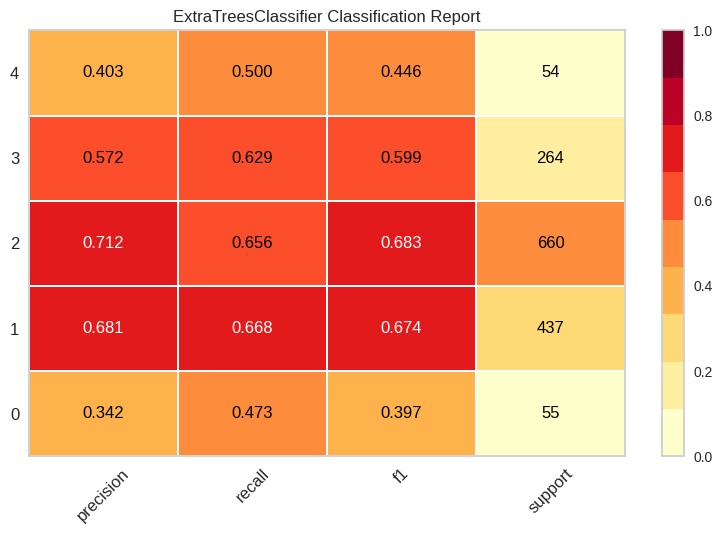

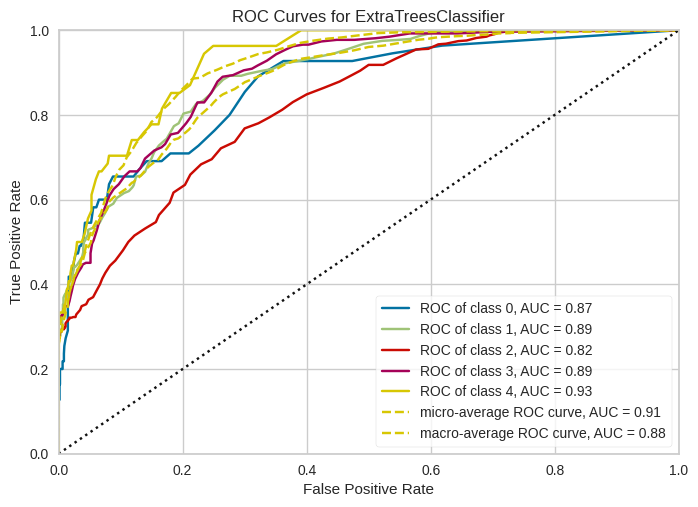

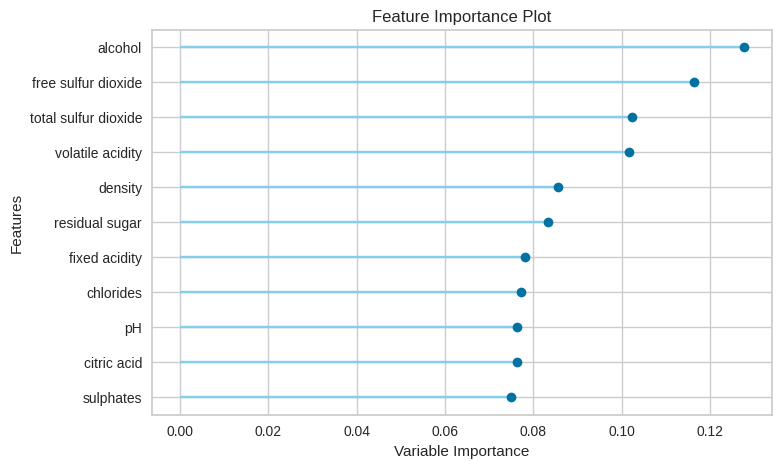

In [57]:
# plot confusion matrix
plot_model(tuned_et, plot = 'confusion_matrix')
# plot performance by class
plot_model(tuned_et, plot = 'class_report')
# plot AUC
plot_model(tuned_et, plot = 'auc')
# plot feature importance
plot_model(tuned_et, plot = 'feature_all')

## Model Interpretation

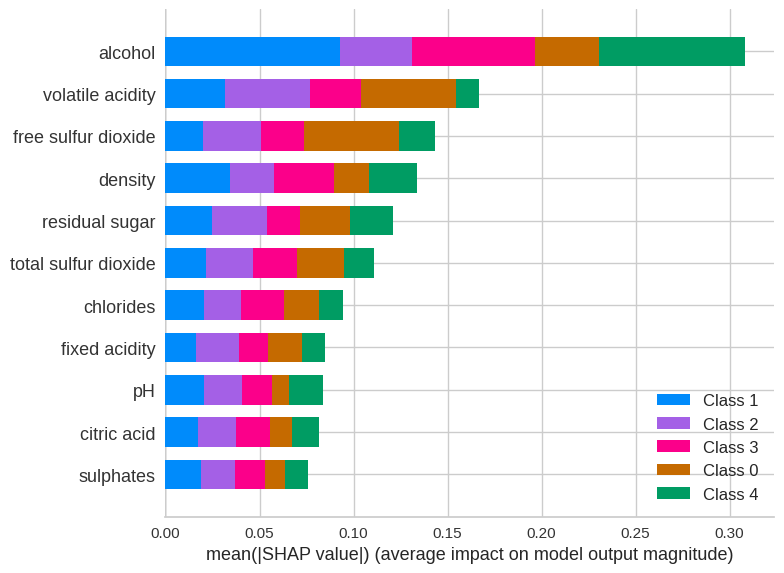

In [68]:
# interpret summary model
interpret_model(tuned_et, plot = 'summary')
# reason plot for test set observation 1
interpret_model(tuned_et, plot = 'reason', observation = 1)

## Save model

In [70]:
# save pipeline
save_model(tuned_et, 'pycaret_pipeline_white_wine_classification4')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [ ]:
c